# Pobieranie i importy

In [ ]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#manipulacja danymi
import pandas as pd
import numpy as np
import math

#wizualizacja
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#scraping
import snscrape.modules.twitter as sntwitter
import requests
import re

#czasowe
from time import sleep
from datetime import date
import datetime

#przygotowanie danych
from sklearn.preprocessing import MinMaxScaler

# Definiowanie Pozyskiwania danych

##Wiadomo≈õci z Tweetera i portali

###Twitter

In [ ]:
def get_tweets_by_query(query, no_tweets):
  tweets = []
  for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets) == no_tweets:
      break
    else:
      tweets.append([tweet.date, tweet.username, tweet.content])

  print(f'Pobrano Tweety zawierajƒÖce: {query}')
  return tweets


def get_tweets_by_queries(no_tweets):
  queries = ['gie≈Çda', 'GPW', 'WIG', 'WIG20', 'WIG30', 'sWIG80', 'mWIG40', 'NewConect', 'sp√≥≈Çka', 'cena', 'kredyt', 'firma', 
              'gospodarka', 'rynek', 'akcje', 'waluta', 'surowce', 'nieruchomo≈õci', 'fabryka', 'bezrobocie', 
             'wska≈∫nik', 'przemys≈Ç', 'zam√≥wienia', 'przedsiƒôbiorstwa', 'produkcja' ] #lista zapyta≈Ñ do pobrania
  tweets = []
  for query in queries:
    tweets.extend(get_tweets_by_query(query, no_tweets))

  df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
  return df


#-------------------------------------------------------------



def get_tweets_by_user(user_name, no_tweets):
  tweets = []
  user = f'(from:{user_name})'
  for tweet in sntwitter.TwitterSearchScraper(user).get_items():
    if len(tweets) == no_tweets:
      break
    else:
      tweets.append([tweet.date, tweet.username, tweet.content])

  print(f'Pobrano Tweety U≈ºytkownika: {user_name}')
  return tweets


def get_tweets_by_users(no_tweets):
  users = ['StockWatchPL','pl_krn','MikRaczynski', 'mbank_research', 'PrzemekSNR', 'pbujak', 'strefainw', 'DPackowski',
           'TrysteroBlog', 'analizy_pl', 'Wilk_z_GPW', 'biznesradar', 'comparic', 'JakInwestowac','RPEkonomia', 'BIPolska',
           'OFinansowy', 'puls_biznesu', 'GPW_WSExchange', 'BiznesAlert', 'PKO_Research', 'GUS_STAT'] #lista u≈ºytkownik√≥w do pobrania
  tweets = []
  for user in users:
    tweets.extend(get_tweets_by_user(user, no_tweets))

  df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
  return df


#-------------------------------------------------------------



def get_twitter_data(no_tweets):
  
  users = get_tweets_by_users(no_tweets)
  #queries = get_tweets_by_queries(no_tweets)
  #tweeter_data = pd.concat([users, queries], ignore_index=True)
  #tweeter_data['Date'] = tweeter_data['Date'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))
  users['Date'] = users['Date'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))
  
  return users
  #return tweeter_data

###Biznes Radar

In [ ]:
def get_biznesradar(number_of_pages):
    
    all_dates = []
    all_titles = []
    all_content = []
    
    for page_number in range(1, number_of_pages+1):
        print(f'Pobieram informacje gospodarcze z Biznes Radar - strona numer {page_number}')
        
        http_address = f'https://www.biznesradar.pl/news-archive/1,{page_number}'
        response = requests.get(http_address)
        content = response.content.decode("utf-8")

        dates = re.findall(r'"record-date">(.+?)\s\d\d.\d\d.\d\d</span>', content, re.DOTALL)
        all_dates.extend(dates)
        

        titles = re.findall(r'<a target="_blank" href.+?rel="nofollow">(.+?)</a>', content, re.DOTALL)
        all_titles.extend(titles)
        
        content = re.findall(r'<div class="record-body">\n\t\t\t\s+(.+?)\n\t\t', content, re.DOTALL)
        all_content.extend(content)
        
        sleep(1)
    
    total = {'Date':all_dates, 'Title': all_titles, 'Content': all_content}
    total =  pd.DataFrame(total)
    #total['Date'] = total['Date'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))
    return total

###bankier.pl

In [ ]:
def get_bankierpl_gospodarka(number_of_pages):
    
    all_dates = []
    all_titles = []
    all_content = []
    
    for page_number in range(1, number_of_pages+1):
        print(f'Pobieram informacje gospodarcze z bankier.pl - strona numer {page_number}')
        
        http_address = f'https://www.bankier.pl/gospodarka/wiadomosci/{page_number}' #max100
        response = requests.get(http_address)
        content = response.content.decode("utf-8")

        data = re.findall(r'<time class="entry-date".+?pubdate>(.+?)\s\d\d.\d\d</time>\n', content, re.DOTALL)
        y = 0
        for x in data:
          if y==10:
            break
          else:
            all_dates.append(x)
            y+=1

        titles = re.findall(r'rel="bookmark">\n\s+(.+?)\n\n', content, re.DOTALL)
        all_titles.extend(titles)
        
        content = re.findall(r'</span>\n\n\s+<p>(.+?)<a href', content, re.DOTALL)
        all_content.extend(content)
        
        sleep(1)
    
    total = {'Date':all_dates, 'Title': all_titles, 'Content': all_content}
    return pd.DataFrame(total)

#-------------------------------------------------------------------------------------

def get_bankierpl_rynki(number_of_pages):
    
    all_dates = []
    all_titles = []
    all_content = []
    
    for page_number in range(1, number_of_pages+1):
        print(f'Pobieram komentarze rynkowe z bankier.pl - strona numer {page_number}')
        
        http_address = f'https://www.bankier.pl/rynki/wiadomosci/{page_number}' #max 65
        response = requests.get(http_address)
        content = response.content.decode("utf-8")

        data = re.findall(r'<time class="entry-date".+?pubdate>(.+?)\s\d\d.\d\d</time>\n', content, re.DOTALL)
        y = 0
        for x in data:
          if y==15:
            break
          else:
            all_dates.append(x)
            y+=1

        titles = re.findall(r'rel="bookmark">\n\s+(.+?)\n\n', content, re.DOTALL)
        all_titles.extend(titles)
        
        content = re.findall(r'</span>\n\n\s+<p>(.+?)<a href', content, re.DOTALL)
        all_content.extend(content)
        
        sleep(1)
    
    total = {'Date':all_dates, 'Title': all_titles, 'Content': all_content}
    return pd.DataFrame(total)


def get_bankierpl(number_of_pages):

  gospodarka = get_bankierpl_gospodarka(number_of_pages)
  rynki = get_bankierpl_rynki(number_of_pages)
  dane = pd.concat([gospodarka, rynki], ignore_index=True)
  #dane['Date'] = dane['Date'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))
  dane = dane.sort_values(by='Date', ignore_index=True)
  return dane

###get_portals

In [ ]:
def get_portals(number_of_pages):
  biznesradar = get_biznesradar(number_of_pages)
  bankier = get_bankierpl(number_of_pages)
  dane = pd.concat([biznesradar, bankier], ignore_index=True)
  dane.sort_values(by="Date", ascending = False, ignore_index=True)
  return dane, biznesradar, bankier


##Sp√≥≈Çki WIG20

In [ ]:
tiki = ['acp', 'ale', 'ccc', 'cdr', 'cps', 'dnp', 
        'jsw', 'kgh', 'kty', 'lpp', 'mbk', 'opl', 'pco', 
        'peo', 'pge', 'pgn', 'pkn', 'pko', 'pzu', 'spl']

tiki_zamkniecie = []
for tik in tiki:
  tiki_zamkniecie.append(f'{tik} Zamkniecie')

tiki_zmiana = []
for tik in tiki:
  tiki_zmiana.append(f'{tik} Zmiana')

tiki_wolumen = []
for tik in tiki:
  tiki_wolumen.append(f'{tik} Wolumen')


# Pojedyncza sp√≥≈Çka wszystkie dane

def get_company(tick):
  
    print(f'Pobieram ceny: {tick}')
    path = f'https://stooq.pl/q/d/l/?s={tick}&i=d'
    dataset = pd.read_csv(path)
    dataset['Data'] = pd.to_datetime(dataset['Data'])
    dataset['Zmiana'] = dataset["Zamkniecie"].pct_change()
    dataset = dataset[['Data', 'Zamkniecie', 'Wolumen', 'Zmiana']]
    dataset.columns = ['Data', f'{tick} Zamkniecie', f'{tick} Wolumen', f'{tick} Zmiana']
    dataset = dataset.set_index('Data')
    dataset = dataset[-2500:] #ostatnie 2500 dni pracujƒÖcych / ok 10 lat
    return dataset

# Wszystkie sp√≥≈Çki wszystkie dane -----------------------------------------------------------------------

def get_stocks():
  acp = get_company('acp') 
  ale = get_company('ale') #12 pa≈∫dziernik 2020
  ccc = get_company('ccc')
  cdr = get_company('cdr')
  cps = get_company('cps')
  dnp = get_company('dnp') # 19 kwietnia 2017
  jsw = get_company('jsw') 
  kgh = get_company('kgh')
  kty = get_company('kty') #jeden dzie≈Ñ brak notowa≈Ñ
  lpp = get_company('lpp')
  mbk = get_company('mbk')
  opl = get_company('opl')
  pco = get_company('pco') # 26 maj 2021
  peo = get_company('peo')
  pge = get_company('pge')
  pgn = get_company('pgn')
  pkn = get_company('pkn')
  pko = get_company('pko')
  pzu = get_company('pzu')
  spl = get_company('spl') #jeden dzie≈Ñ brak notowa≈Ñ
  wig20 = get_company('wig20')
  wig = get_company('wig')
  all = pd.concat([acp, ale, ccc, cdr, cps, dnp, 
        jsw, kgh, kty, lpp, mbk, opl, pco, 
        peo, pge, pgn, pkn, pko, pzu, spl], axis=1)

  return all, wig20, wig

#tylko zmiana procentowa -----------------------------------------------------------------------

def get_change(tick):
  
    print(f'Pobieram dzienne zmiany procentowe: {tick}')
    path = f'https://stooq.pl/q/d/l/?s={tick}&i=d'
    dataset = pd.read_csv(path)
    dataset['Data'] = pd.to_datetime(dataset['Data'])
    dataset['Zmiana'] = dataset["Zamkniecie"].pct_change()
    dataset = dataset[['Data', 'Zmiana']]
    dataset.columns = ['Data', f'{tick}']
    dataset = dataset.set_index('Data')
    dataset = dataset[-2500:] #ostatnie 2500 dni pracujƒÖcych / ok 10 lat
    return dataset

def get_price_change():
  acp = get_change('acp') 
  ale = get_change('ale') #12 pa≈∫dziernik 2020
  ccc = get_change('ccc')
  cdr = get_change('cdr')
  cps = get_change('cps')
  dnp = get_change('dnp') # 19 kwietnia 2017
  jsw = get_change('jsw') 
  kgh = get_change('kgh')
  kty = get_change('kty') #jeden dzie≈Ñ brak notowa≈Ñ
  lpp = get_change('lpp')
  mbk = get_change('mbk')
  opl = get_change('opl')
  pco = get_change('pco') # 26 maj 2021
  peo = get_change('peo')
  pge = get_change('pge')
  pgn = get_change('pgn')
  pkn = get_change('pkn')
  pko = get_change('pko')
  pzu = get_change('pzu')
  spl = get_change('spl') #jeden dzie≈Ñ brak notowa≈Ñ

  all = pd.concat([acp, ale, ccc, cdr, cps, dnp, 
        jsw, kgh, kty, lpp, mbk, opl, pco, 
        peo, pge, pgn, pkn, pko, pzu, spl], axis=1)
  
  return all


#tylko wolumeny ------------------------------------------------------------------------

def get_volumen(tick):
  
    print(f'Pobieram dzienne wolumeny obrotu: {tick}')
    path = f'https://stooq.pl/q/d/l/?s={tick}&i=d'
    dataset = pd.read_csv(path)
    dataset['Data'] = pd.to_datetime(dataset['Data'])
    dataset = dataset[['Data', 'Wolumen']]
    dataset.columns = ['Data', f'{tick}']
    dataset = dataset.set_index('Data')
    dataset = dataset[-2500:] #ostatnie 2500 dni pracujƒÖcych / ok 10 lat
    return dataset

def get_all_volumen():
  acp = get_volumen('acp') 
  ale = get_volumen('ale') #12 pa≈∫dziernik 2020
  ccc = get_volumen('ccc')
  cdr = get_volumen('cdr')
  cps = get_volumen('cps')
  dnp = get_volumen('dnp') # 19 kwietnia 2017
  jsw = get_volumen('jsw') 
  kgh = get_volumen('kgh')
  kty = get_volumen('kty') #jeden dzie≈Ñ brak notowa≈Ñ
  lpp = get_volumen('lpp')
  mbk = get_volumen('mbk')
  opl = get_volumen('opl')
  pco = get_volumen('pco') # 26 maj 2021
  peo = get_volumen('peo')
  pge = get_volumen('pge')
  pgn = get_volumen('pgn')
  pkn = get_volumen('pkn')
  pko = get_volumen('pko')
  pzu = get_volumen('pzu')
  spl = get_volumen('spl') #jeden dzie≈Ñ brak notowa≈Ñ

  all = pd.concat([acp, ale, ccc, cdr, cps, dnp, 
        jsw, kgh, kty, lpp, mbk, opl, pco, 
        peo, pge, pgn, pkn, pko, pzu, spl], axis=1)
  
  return all


# Pobieranie danych

##portale

In [ ]:
portals, biznesradar, bankier = get_portals(65) #max stron na bankier rynki

Pobieram informacje gospodarcze z Biznes Radar - strona numer 1
Pobieram informacje gospodarcze z Biznes Radar - strona numer 2
Pobieram informacje gospodarcze z Biznes Radar - strona numer 3
Pobieram informacje gospodarcze z Biznes Radar - strona numer 4
Pobieram informacje gospodarcze z Biznes Radar - strona numer 5
Pobieram informacje gospodarcze z Biznes Radar - strona numer 6
Pobieram informacje gospodarcze z Biznes Radar - strona numer 7
Pobieram informacje gospodarcze z Biznes Radar - strona numer 8
Pobieram informacje gospodarcze z Biznes Radar - strona numer 9
Pobieram informacje gospodarcze z Biznes Radar - strona numer 10
Pobieram informacje gospodarcze z Biznes Radar - strona numer 11
Pobieram informacje gospodarcze z Biznes Radar - strona numer 12
Pobieram informacje gospodarcze z Biznes Radar - strona numer 13
Pobieram informacje gospodarcze z Biznes Radar - strona numer 14
Pobieram informacje gospodarcze z Biznes Radar - strona numer 15
Pobieram informacje gospodarcze z 

##Twitter

In [ ]:
twitter = get_twitter_data(200)

Pobrano Tweety U≈ºytkownika: StockWatchPL
Pobrano Tweety U≈ºytkownika: pl_krn
Pobrano Tweety U≈ºytkownika: MikRaczynski
Pobrano Tweety U≈ºytkownika: mbank_research
Pobrano Tweety U≈ºytkownika: PrzemekSNR
Pobrano Tweety U≈ºytkownika: pbujak
Pobrano Tweety U≈ºytkownika: strefainw
Pobrano Tweety U≈ºytkownika: DPackowski
Pobrano Tweety U≈ºytkownika: TrysteroBlog
Pobrano Tweety U≈ºytkownika: analizy_pl
Pobrano Tweety U≈ºytkownika: Wilk_z_GPW
Pobrano Tweety U≈ºytkownika: biznesradar
Pobrano Tweety U≈ºytkownika: comparic
Pobrano Tweety U≈ºytkownika: JakInwestowac
Pobrano Tweety U≈ºytkownika: RPEkonomia
Pobrano Tweety U≈ºytkownika: BIPolska
Pobrano Tweety U≈ºytkownika: OFinansowy
Pobrano Tweety U≈ºytkownika: puls_biznesu
Pobrano Tweety U≈ºytkownika: GPW_WSExchange
Pobrano Tweety U≈ºytkownika: BiznesAlert
Pobrano Tweety U≈ºytkownika: PKO_Research
Pobrano Tweety U≈ºytkownika: GUS_STAT


##Gie≈Çda

In [ ]:
stocks, wig20, wig = get_stocks()

Pobieram ceny: acp
Pobieram ceny: ale
Pobieram ceny: ccc
Pobieram ceny: cdr
Pobieram ceny: cps
Pobieram ceny: dnp
Pobieram ceny: jsw
Pobieram ceny: kgh
Pobieram ceny: kty
Pobieram ceny: lpp
Pobieram ceny: mbk
Pobieram ceny: opl
Pobieram ceny: pco
Pobieram ceny: peo
Pobieram ceny: pge
Pobieram ceny: pgn
Pobieram ceny: pkn
Pobieram ceny: pko
Pobieram ceny: pzu
Pobieram ceny: spl
Pobieram ceny: wig20
Pobieram ceny: wig


#Wizualizacje ilo≈õci

##Ilo≈õƒá

###Wszystkie dane - ilo≈õƒá

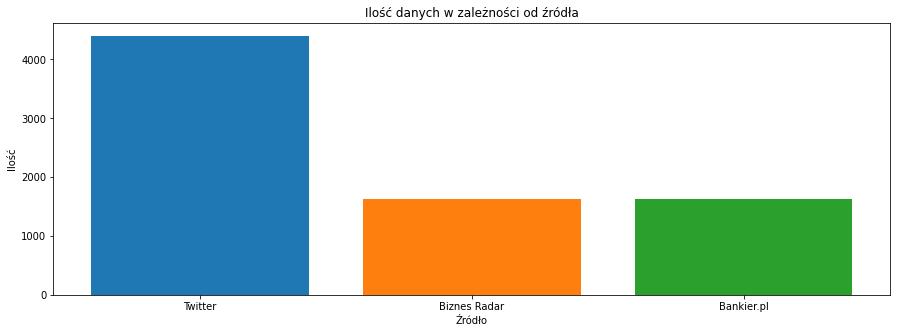

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
plt.bar("Twitter", len(twitter),)
plt.bar("Biznes Radar", len(biznesradar))
plt.bar("Bankier.pl", len(bankier))
ax.set_xlabel("≈πr√≥d≈Ço")
ax.set_ylabel('Ilo≈õƒá')
plt.title('Ilo≈õƒá danych w zale≈ºno≈õci od ≈∫r√≥d≈Ça')
plt.show()

###Same portale - podzia≈Ç na ilo≈õƒá

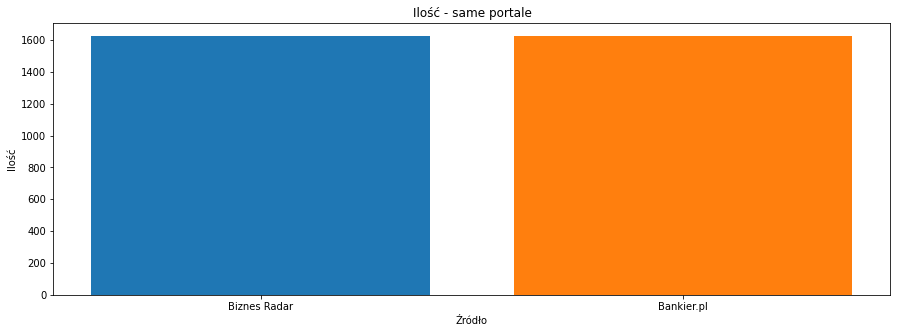

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
plt.bar("Biznes Radar", len(biznesradar))
plt.bar("Bankier.pl", len(bankier))
ax.set_xlabel("≈πr√≥d≈Ço")
ax.set_ylabel('Ilo≈õƒá')
plt.title('Ilo≈õƒá - same portale')
plt.show()

## wystƒôpowanie w czasie

###Twitter

In [ ]:
#tabela pokazujƒÖca ilo≈õƒá wystƒôpowania w danych dniach
tw_uni_date = twitter['Date'].unique()
tw_dates = twitter['Date']
tw_uni_count = []
for x in tw_uni_date:
  num = 0
  for y in tw_dates:
    if x == y:
      num += 1
  tw_uni_count.append(num)
tweeter_by_date = {'Date':tw_uni_date, 'Count': tw_uni_count,}
tweeter_by_date = pd.DataFrame(tweeter_by_date)
tweeter_by_date['Date'] = tweeter_by_date['Date'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))
tweeter_by_date = tweeter_by_date.sort_values(by='Date', ignore_index=True)

Wszytskie tweety w czasie

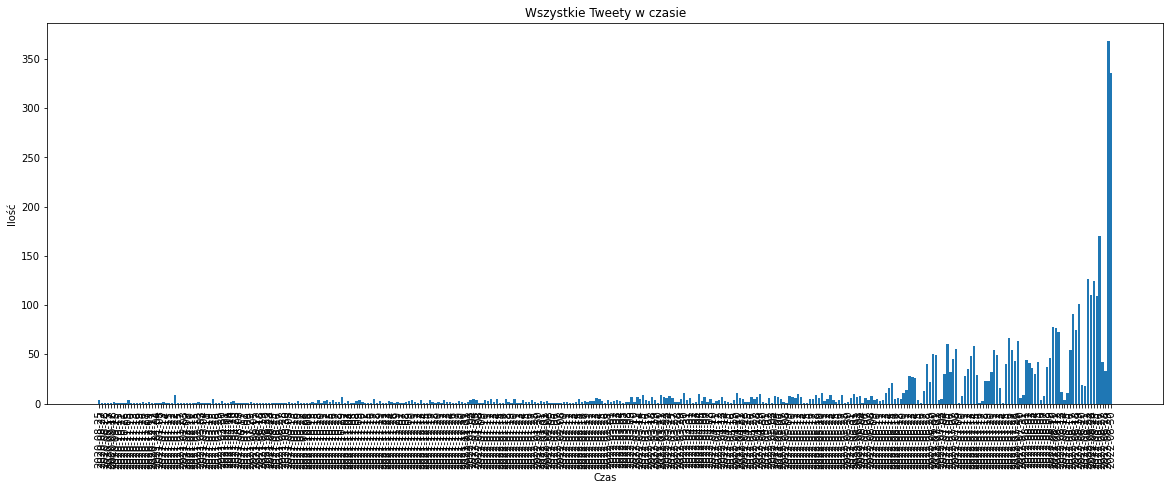

In [ ]:
fig, ax = plt.subplots(figsize=(20,7))
plt.bar(tweeter_by_date.Date, tweeter_by_date.Count)
ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel("Czas")
ax.set_ylabel('Ilo≈õƒá')
plt.title("Wszystkie Tweety w czasie")
plt.show()

Tweety - ostatnie 30 dni

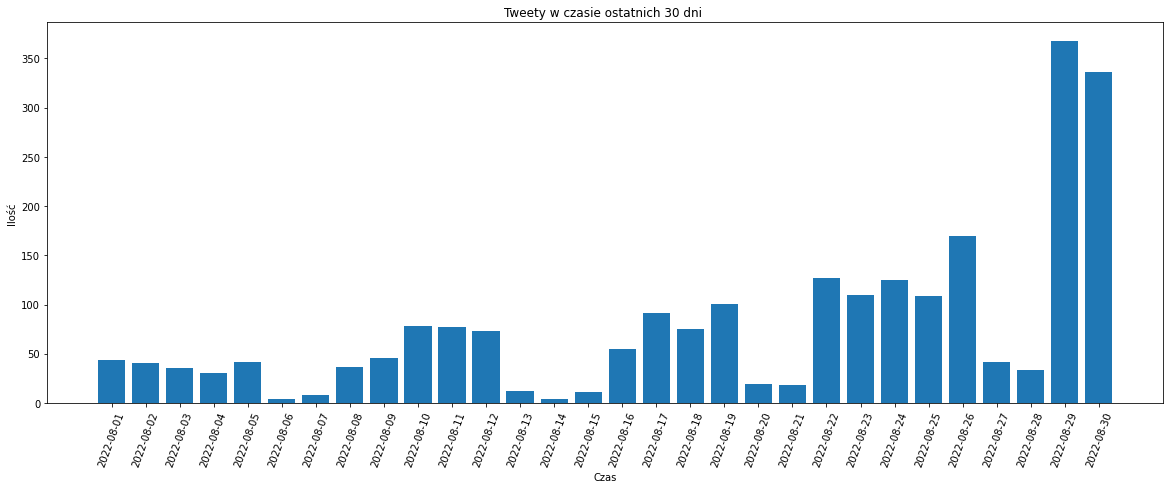

In [ ]:
fig, ax = plt.subplots(figsize=(20,7))
plt.bar(tweeter_by_date.Date[-30:], tweeter_by_date.Count[-30:])
ax.xaxis.set_tick_params(rotation=70)
ax.set_xlabel("Czas")
ax.set_ylabel('Ilo≈õƒá')
plt.title("Tweety w czasie ostatnich 30 dni ")
plt.show()

###Portale

In [ ]:
#tabela pokazujƒÖca ilo≈õƒá wystƒôpowania w danych dniach
def portal_count_by_date(portal):
  uni_date = portal['Date'].unique()
  dates = portal['Date']
  uni_count = []
  for x in uni_date:
    num = 0
    for y in dates:
      if x == y:
        num += 1
    uni_count.append(num)
  by_date = {'Date':uni_date, 'Count': uni_count}
  by_date = pd.DataFrame(by_date)
  by_date = by_date.sort_values(by='Date', ignore_index=True)
  return by_date

In [ ]:
biznes_by_date = portal_count_by_date(biznesradar)
bankier_by_date = portal_count_by_date(bankier)

Biznes Radar

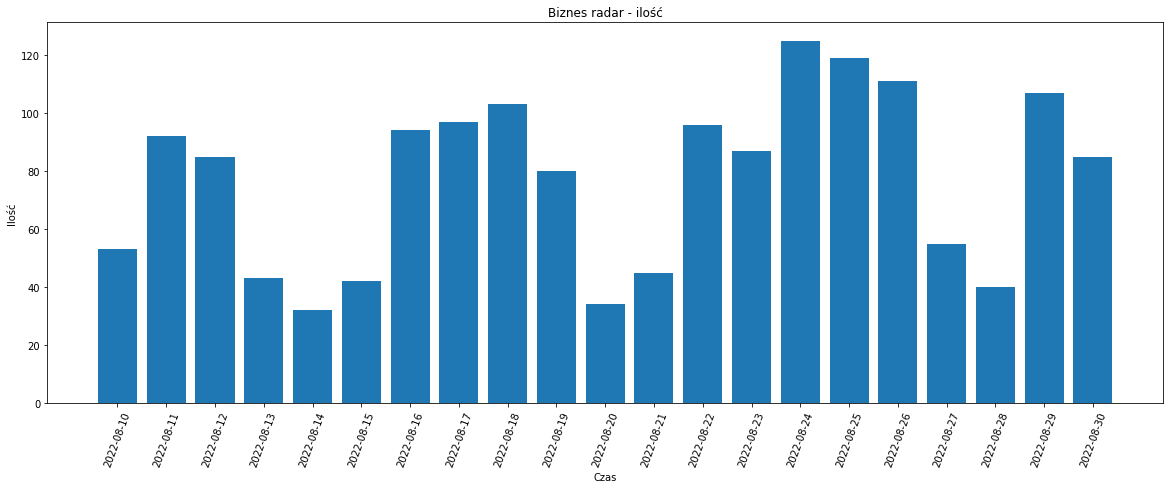

In [ ]:
fig, ax = plt.subplots(figsize=(20,7))
ax.bar(biznes_by_date.Date, biznes_by_date.Count)
ax.xaxis.set_tick_params(rotation=70)
ax.set_xlabel("Czas")
ax.set_ylabel('Ilo≈õƒá')
plt.title("Biznes radar - ilo≈õƒá")
plt.show()

bankier.pl

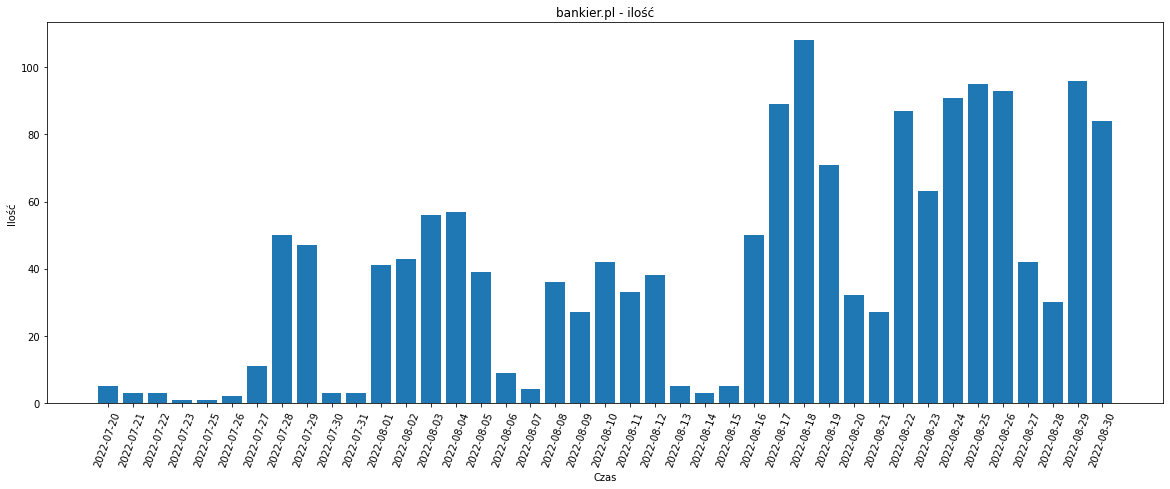

In [ ]:
fig, ax = plt.subplots(figsize=(20,7))
ax.bar(bankier_by_date.Date, bankier_by_date.Count)
ax.xaxis.set_tick_params(rotation=70)
ax.set_xlabel("Czas")
ax.set_ylabel('Ilo≈õƒá')
plt.title("bankier.pl - ilo≈õƒá")
plt.show()

#Ogarnianie textu

##Usuwanie user z tweetera

In [ ]:
twitter_no_user = twitter[['Date','Tweet']]
twitter_no_user = twitter_no_user.sort_values(by='Date', ignore_index=True, ascending=False)
twitter_no_user

Date                                              Tweet
0     2022-08-30  Sprzeda≈º mieszka≈Ñ bardzo spowolni≈Ça i nie ma p...
1     2022-08-30  UE chce ta≈Ñszej energii. Co czeka europejskƒÖ g...
2     2022-08-30  Polimex-Mostostal ca≈Çe wakacje w wƒÖskiej konso...
3     2022-08-30  Stabilizacja z≈Çotego. Z≈Çoty wyceniany jest prz...
4     2022-08-30  Bitcoin wykrwawia siƒô czekajƒÖc na bohatera. Sk...
...          ...                                                ...
4395  2020-08-27  Pigu≈Ça informacyjna od #NEUCA Do dyspozycji ab...
4396  2020-08-25  @Cyfrowy_Ja jak w przyrodzie - nie ma dw√≥ch id...
4397  2020-08-25  @Cyfrowy_Ja Teksty z tej serii przygotowujemy ...
4398  2020-08-25  @Cyfrowy_Ja czy mo≈ºemy potraktowaƒá to ‚û°Ô∏è  http...
4399  2020-08-25  @Cyfrowy_Ja @RafSkrzypczyk W jakim sensie "wyb...

[4400 rows x 2 columns]

##≈ÅƒÖczenie nag≈Ç√≥wka i poczƒÖtku artyku≈Ç√≥w z portali

In [ ]:
portals["combine"] = portals['Title'].astype(str) +" "+ portals["Content"]
portals_combine = portals[['Date', 'combine']]
portals_combine

Date                                            combine
0     2022-08-30  Tak siƒô pracuje w wielu firmach w Polsce. Od Z...
1     2022-08-30  Polskƒô i Ukrainƒô po≈ÇƒÖczy rurociƒÖg. Bƒôdzie tran...
2     2022-08-30  Morawiecki: przyjmujemy ewentualnƒÖ konieczno≈õƒá...
3     2022-08-30  UE przekazuje 5 mln tabletek jodku potasu Ukra...
4     2022-08-30  Eurocash nie wyklucza przejƒôƒá, ale stawia na o...
...          ...                                                ...
3245  2022-08-30  Wyniki Asseco Poland w II kw. 2022 roku vs. ko...
3246  2022-08-30  MF: Czynnikami ryzyka dla prognoz makro wojna ...
3247  2022-08-30  Statbel: inflacja w Belgii w sierpniu by≈Ça naj...
3248  2022-08-30  Tauron zako≈Ñczy≈Ç naprawƒô boku 910 MW w Jaworzn...
3249  2022-08-30  Niemiecka inflacja wyr√≥wna≈Ça historyczny rekor...

[3250 rows x 2 columns]

##≈ÅƒÖczenie 2 baz ze sobƒÖ

In [ ]:
twitter_no_user.rename(columns = {'Tweet':'Text'}, inplace = True)
portals_combine.rename(columns = {'combine':'Text'}, inplace = True)
frames = [twitter_no_user, portals_combine]
all = pd.concat(frames, ignore_index=True )

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
all = all.sort_values(by='Date', ignore_index=True, ascending=False)

In [ ]:
all.sample(20)

Date                                               Text
1968  2022-08-25  RzƒÖd chce przeznaczyƒá miliardy z≈Ç na inwestycj...
725   2022-08-29  Kurs dolara wsparty niez≈Çomno≈õciƒÖ Fed, euro na...
7616  2021-01-14  Wiƒôkszo≈õƒá rekomendacji wydanych w grudniu to t...
5270  2022-08-03  Poznaj #PortalGeostatystyczny w nowej ods≈Çonie...
7405  2022-01-12  W ubieg≈Çym roku na rynkach finansowych wra≈ºe≈Ñ ...
4385  2022-08-12  GUS rewiduje dane o lipcowej inflacji. Szczytu...
3328  2022-08-19  Wiceminister Cieci√≥ra: BƒôdƒÖ wyp≈Çacane rekompen...
628   2022-08-29  Ulga na ekspansjƒô a reklama i sprzeda≈º w Inter...
7215  2022-03-24  Podobnie jak wielko≈õƒá sektor√≥w bankowych, tak ...
4063  2022-08-16  YouTube planuje wprowadziƒá nowƒÖ us≈Çugƒô. Ma niƒÖ...
4354  2022-08-12  Mocny skok #inflacja w lipcu. #GUS poda≈Ç ostat...
286   2022-08-30  Tauron zako≈Ñczy≈Ç naprawƒô leja kot≈Ça bloku 910 ...
1886  2022-08-25  .@JerzyBuzek wystosowa≈Ç pytanie do Komisji Eur...
1492  2022-08-26  PKP Cargo spodziewa siƒô szczytu przewoz√≥w wƒôgl...
171   2022-08-30  PIE: ≈õrednie polskie firmy sƒÖ dwa razy mniej p...
3447  2022-08-18  Wirtualna Polska kupi≈Ça 40 proc. udzia≈Ç√≥w w Pa...
565   2022-08-29  Glapi≈Ñski o stopach proc.: RPP podwy≈ºszy raz l...
7415  2022-01-05  Polskie akcje da≈Çy nie≈∫le zarobiƒá. https://t.c...
7085  2022-04-26  Z prawnego punktu widzenia stosunek najmu zach...
3560  2022-08-18  Japonia zachƒôca obywateli do picia alkoholu. T...

##PL Stop words - usuwanie

In [ ]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python3 -m spacy download pl_core_news_sm

In [ ]:
import spacy
import pl_core_news_sm

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
pl_stop_words = ['a', 'aby', 'ach', 'acz', 'aczkolwiek', 'aj', 'albo', 'ale', 'ale≈º', 'ani', 'a≈º', 
                 'bardziej', 'bardzo', 'bo', 'bowiem', 'by', 'byli', 'bynajmniej', 'byƒá', 'by≈Ç', 'by≈Ça', 
                 'by≈Ço', 'by≈Çy', 'bƒôdzie', 'bƒôdƒÖ', 'cali', 'ca≈Ça', 'ca≈Çy', 'ci', 'ciƒô', 'ciebie', 'co','cokolwiek', 
                 'co≈õ', 'czasami', 'czasem', 'czemu', 'czy', 'czyli', 'daleko', 'dla', 'dlaczego', 
                 'dlatego', 'do', 'dobrze', 'dokƒÖd', 'do≈õƒá', 'du≈ºo', 'dwa', 'dwaj', 'dwie', 'dwoje', 'dzi≈õ', 'dzisiaj', 
                 'gdy', 'gdyby', 'gdy≈º', 'gdzie', 'gdziekolwiek', 'gdzie≈õ', 'i', 'ich', 'ile', 'im', 'inna', 'inne', 'inny', 
                 'innych', 'i≈º', 'ja', 'jƒÖ', 'jak', 'jaka≈õ', 'jakby', 'jaki', 'jakich≈õ', 'jakie', 'jaki≈õ', 'jaki≈º', 
                 'jakkolwiek', 'jako', 'jako≈õ', 'je', 'jeden', 'jedna', 'jedno', 'jednak', 'jednak≈ºe', 'jego', 'jej', 'jemu', 
                 'jest', 'jestem', 'jeszcze', 'je≈õli', 'je≈ºeli', 'ju≈º', 'jƒÖ', 'ka≈ºdy', 'kiedy', 'kilka', 'kim≈õ', 'kto', 
                 'ktokolwiek', 'kto≈õ', 'kt√≥ra', 'kt√≥re', 'kt√≥rego', 'kt√≥rej', 'kt√≥ry', 'kt√≥rych', 'kt√≥rym', 'kt√≥rzy', 'ku', 
                 'lat', 'lecz', 'lub', 'ma', 'majƒÖ', 'mieƒá', 'm√≥c', 'ma≈Ço', 'mam', 'mi', 'mimo', 'miƒôdzy', 'mnƒÖ', 'mnie', 'mogƒÖ', 'moi', 
                 'moim', 'moja', 'moje', 'mo≈ºe', 'mo≈ºliwe', 'mo≈ºna', 'm√≥j', 'mu', 'musi', 'my', 'na', 'nad', 'nam', 'nami', 
                 'nas', 'nasi', 'nasz', 'nasza', 'nasze', 'naszego', 'naszych', 'natomiast', 'natychmiast', 'nawet', 'niƒÖ', 
                 'nic', 'nich', 'nie', 'niech', 'niego', 'niej', 'niemu', 'nigdy', 'nim', 'nimi', 'ni≈º', 'no', 'o', 'obok', 
                 'od', 'oko≈Ço', 'on', 'ona', 'one', 'oni', 'ono', 'oraz', 'oto', 'owszem', 'pan', 'pana', 'pani', 'po', 
                 'pod', 'podczas', 'pomimo', 'ponad', 'poniewa≈º', 'powinien', 'powinna', 'powinni', 'powinno', 'poza', 'prawie', 
                 'przecie≈º', 'przed', 'przede', 'przedtem', 'przez', 'przy', 'roku', 'r√≥wnie≈º', 'sama', 'sƒÖ', 'siƒô', 'skƒÖd', 
                 'sobie', 'sobƒÖ', 'spos√≥b', 'swoje', 'ta', 'tak', 'taka', 'taki', 'takie', 'tak≈ºe', 'tam', 'te', 'tego', 'tej', 
                 'temu', 'ten', 'teraz', 'te≈º', 'to', 'tobƒÖ', 'tobie', 'tote≈º', 'trzeba', 'tu', 'tutaj', 'twoi', 'twoim', 'twoja', 
                 'twoje', 'twym', 'tw√≥j', 'ty', 'tych', 'tylko', 'tym', 'u', 'w', 'wam', 'wami', 'was', 'wasz', 'wasza', 'wasze', 
                 'we', 'wed≈Çug', 'wiele', 'wielu', 'wiƒôc', 'wiƒôcej', 'wszyscy', 'wszystkich', 'wszystkie', 'wszystkim', 'wszystko', 
                 'wtedy', 'wy', 'w≈Ça≈õnie', 'z', 'za', 'zapewne', 'zawsze', 'ze', 'z≈Ç', 'znowu', 'zn√≥w', 'zosta≈Ç', '≈ºaden', '≈ºadna', 
                 '≈ºadne', '≈ºadnych', '≈ºe', '≈ºeby', '@', '#', '$', '!', '%', '.', ',', '?', '-', ':', '"', ';', '&', ')', '(', 'https',
                 '//t.co', '/', '-', '...', '‚Äî', '_' 't', 'm', 'in', 'SWIG80', 'WIG20', 'raz', 'jeden', 'miesiƒÖc', 'stycze≈Ñ', 'luty', 'marzec', 
                 'kwiecie≈Ñ', 'maj', 'czerwiec', 'lipiec', 'sierpie≈Ñ', 'wrzesie≈Ñ', 'pa≈∫dziernik', 'listopad', 'grudzie≈Ñ', 'quot', 'WIG', 
                 'wig', 'rok', 'GPW', 'dzie≈Ñ', 'tydzie≈Ñ', '\n', '‚Ä¶', '`','the', 'is', 'of', 'for', 'it', 'ii', 'q', 'and', 'm', 'q' 'kw', 's'
                 's', 'poniedzia≈Çek', 'wtorek', '≈õroda', 'czwartek', 'piƒÖtek', 'sobota', 'niedziela', 'Polska', 'polski']

In [ ]:
all_no_stop = []
all_lower =[]
a = []
for text in all['Text']:
  a.append(word_tokenize(text))


for text in a:
  b = []
  for word in text:
    x = word.lower()
    b.append(x)
  all_lower.append(b)
  
for text in all_lower:
  c = []
  for word in text:
     if word not in pl_stop_words:
      c.append(word)
  all_no_stop.append(' '.join(c))
      


In [ ]:
all_no_stop[300]

'rzƒÖd przyjƒÖ≈Ç projekt bud≈ºet 2023 zak≈Çada 65 mld deficytu //t.co/ktwidxyvsn'

In [ ]:
len(all_no_stop)

7650

##Usuwanie link√≥w

In [ ]:
all_no_stop_no_link = []
regex = r"//t.co/.........."
for sentence in all_no_stop:
  a = re.sub(regex, '', sentence)
  all_no_stop_no_link.append(a)


In [ ]:
all_no_stop_no_link[300]

'rzƒÖd przyjƒÖ≈Ç projekt bud≈ºet 2023 zak≈Çada 65 mld deficytu '

In [ ]:
len(all_no_stop_no_link)

7650

In [ ]:
all['Text'] = all_no_stop_no_link

In [ ]:
all.sample(20)

Date                                               Text
4969  2022-08-08  og√≥le pomys≈Ç por√≥wnywaƒá inwestowanie lokaty in...
2281  2022-08-24  portugalia oszacowa≈Ça koszt budowy gazociƒÖgu g...
5597  2022-07-28  wiƒôkszy wolumen obr√≥t wig20 zas≈Çuga ogromnych ...
3892  2022-08-17  eo networks planuje wyp≈Çaciƒá 0,4 dywidendy zys...
3160  2022-08-19  wicepremier ukrainy gospodarka kraju skurczyƒá ...
6102  2022-07-14  piotrko31235341 zmiany relatywne czƒô≈õƒá cen sta...
2549  2022-08-23  malƒÖg waloryzacja rent emerytur siƒôgnie 10 pro...
5324  2022-08-02                    wiktorbarcicki druga najwiƒôksza
3884  2022-08-17  ropa zaliczy≈Ça najni≈ºszƒÖ cenƒô 6 miesiƒôcy ruszy...
3450  2022-08-18  mbank obni≈ºy≈Ç prognozƒô wzrostu gospodarczego '...
5345  2022-08-02  jacek85281417 bym cieszy≈Ç ekstra atrakcja bmp ...
1540  2022-08-26  üáµüá± a. moskwa poinformowa≈Ça rzƒÖd pracuje zamro≈º...
6694  2022-06-24  miejsce kontynuacjƒô serii podwy≈ºek st√≥p nbp 75...
2830  2022-08-22  columbus energy rozpoczyna sprzeda≈º instalacji...
3997  2022-08-16  dodatek wƒôglowy rekompensaty ciep≈Ça przyjƒôte r...
6074  2022-07-15  maju warto≈õƒá polskiego importu rosji spad≈Ça po...
2735  2022-08-22  gwa≈Çtowny wzrost cen gazu europie rano holende...
7599  2021-02-11  miesiƒÖc analitycy bmmbanku przedstawili swojƒÖ ...
6755  2022-06-22  fob_poland ramach prowadzonego maja 2021 r. pr...
4448  2022-08-12  katastrofa ekologiczna odrze stan klƒôski ≈ºywio...

##Lemmantyzacja

###Stokenizowane, zlemantyzowane i wolne od stop words√≥w pojedyncze s≈Çowa

In [ ]:
nlp = spacy.load('pl_core_news_sm')

In [ ]:
words_lemma = []
for x in all['Text']:
  doc = nlp(x)
  for word in doc:
    words_lemma.append(word.lemma_)
  

In [ ]:
words_lemma_no_stop =[]
for word in words_lemma:
  if word not in pl_stop_words:
    words_lemma_no_stop.append(word)

In [ ]:
words_lemma_no_stop

['sprzeda≈º',
 'mieszkanie',
 'spowolniƒá',
 'pole',
 'podnoszeƒá',
 'cena',
 'zwiƒÖzek',
 'mar≈ºe',
 'spadaƒá',
 'm√≥wiƒá',
 'cfo',
 'marvipolu',
 'mieszkanie',
 'stanieƒá',
 'polak',
 'pow√≥d',
 'wysoki',
 'cena',
 'postanowiƒá',
 'wstrzymaƒá',
 'decyzja',
 'zakup',
 'w≈Çasny',
 'metr',
 'm√≥wiƒá',
 'sytuacja',
 'rynek',
 'mieszkaniowy',
 'sam',
 'deweloper',
 'kszta≈Çtowaƒá',
 'sytuacja',
 'wt√≥rny',
 'rynek',
 'nieruchomo≈õƒá',
 'szef',
 'mon',
 'rekordowy',
 'bud≈ºet',
 'si≈Ça',
 'zbrojny',
 'rp',
 '2023',
 'rekordowy',
 'bud≈ºet',
 'si≈Ça',
 'zbrojny',
 'rp',
 '2023',
 'o≈õwiadczyƒá',
 'wicepremier',
 'szef',
 'mon',
 'Mariusz',
 'b≈Çaszczak',
 'odnoszeƒá',
 'przyjƒôty',
 'rzƒÖd',
 'projekt',
 'ustawa',
 'bud≈ºetowy',
 '2023',
 'kara',
 'tsue',
 'ws',
 'sƒôdzia',
 'przekroczyƒá',
 '300',
 'milion',
 'euro',
 'kupiƒá',
 'kara',
 'niezastosowanie',
 'postanowienie',
 'trybuna≈Ç',
 'sprawiedliwo≈õƒá',
 'unia',
 'europejski',
 'sprawa',
 'system',
 'dyscyplinarny',
 'sƒôdzia',
 'prze

###Data Frame zlemantyzowana i bez stop words√≥w

In [ ]:
all_no_stop_lemma = []

for text in all['Text']:
  doc = nlp(text)
  a = []
  for word in doc:
    a.append(word.lemma_)
      
  all_no_stop_lemma.append(' '.join(a))

In [ ]:
all['Text'] = all_no_stop_lemma

In [ ]:
all.sample(15)

Date                                               Text
1744  2022-08-25  przynie≈õƒá lekki odreagowaƒá gpwa przynie≈õƒá lekk...
2420  2022-08-23  premier gra gasa station simulator wersja kons...
4235  2022-08-13  wa≈ºyƒá los drewno pomorski las brat szef orlen ...
1008  2022-08-29  student uczelnia cywilny zainteresowany s≈Çu≈ºba...
6724  2022-06-23  norgesbanek üá≥ üá¥ agresywny podwy≈ºka stopa ≈õwiat...
5693  2022-07-27                   mprzasnysek pewnie nieco dro≈ºsze
1555  2022-08-26  ≈õwiƒôtujeƒá 60lecie powstaƒá urzƒÖd statystyczny ü•≥...
562   2022-08-29  nadchodziƒá recesyjny jesie≈Ñ gospodarka indeks ...
4476  2022-08-11  powstaƒá panattoni park ≈ºara panattoniƒá park ≈ºa...
3747  2022-08-17  golabartek zaskoczenie skala zapasy wƒÖtpiƒá ` `...
2333  2022-08-24  Misiewicz z≈Ço≈ºyƒá apelacja ws nielegalny reklam...
1083  2022-08-28  trzcio≈Çek rynek oczekowaƒá obni≈ºeka stopa proce...
1507  2022-08-26  zabawny dax sypie powell wcze≈õnie przeszkadzaƒá...
5130  2022-08-04  bank anglia dokonaƒá najwiƒôkszej 27 podwy≈ºka st...
6521  2022-07-01  pmi generalnie przeszacowowaƒá spowolnieƒá ca≈Çy ...

##Podzia≈Ç datami

In [ ]:
all_by_date = all.groupby('Date')['Text'].agg(lambda col: ''.join(col))

In [ ]:
pd.DataFrame(all_by_date)

Text
Date                                                         
2020-08-25  cyfrowy_ja tekst seria przygotowujeƒá 1,5 nazbi...
2020-08-27  piguƒá informacyjny neucaƒá dyspozycja abonent b...
2020-08-28  nieoczekiwany skutek pandemia ` ` samo trudno ...
2020-09-15  ‚Äú think that ever time you see word ebitda you...
2020-09-17  Bogus≈Çaw sieczkowski selvito akwizycjach ‚Äû d≈Çu...
...                                                       ...
2022-08-26  producent ≈ºywno≈õƒá nap√≥j apelowaƒá premier inter...
2022-08-27  du≈ºy ≈õwiat sprzedawca internetowy zobowiƒÖzaƒá o...
2022-08-28  europejski organizacja sƒôdziowski zaskar≈ºyƒá za...
2022-08-29  du≈ºy ≈õwiat targ sprzƒôt elektroniczny zamknƒÖƒá p...
2022-08-30  sprzeda≈º mieszkanie spowolniƒá pole podnoszeƒá c...

[347 rows x 1 columns]

##Podzia≈Ç na sentencje

In [ ]:
all_token_sentence = []
for text in all['Text']:
  all_token_sentence.append(sent_tokenize(text))

In [ ]:
all_token_sentence

[['sprzeda≈º mieszkanie spowolniƒá pole podnoszeƒá cena zwiƒÖzek mar≈ºe spadaƒá m√≥wiƒá cfo marvipolu'],
 ['mieszkanie stanieƒá polak pow√≥d wysoki cena postanowiƒá wstrzymaƒá decyzja zakup w≈Çasny metr .',
  'm√≥wiƒá sytuacja rynek mieszkaniowy sam deweloper kszta≈Çtowaƒá sytuacja wt√≥rny rynek nieruchomo≈õƒá'],
 ['szef mon rekordowy bud≈ºet si≈Ça zbrojny rp 2023 rekordowy bud≈ºet si≈Ça zbrojny rp 2023 o≈õwiadczyƒá wicepremier szef mon Mariusz b≈Çaszczak odnoszeƒá przyjƒôty rzƒÖd projekt ustawa bud≈ºetowy 2023'],
 ['kara tsue ws sƒôdzia przekroczyƒá 300 milion euro kupiƒá kara niezastosowanie postanowienie trybuna≈Ç sprawiedliwo≈õƒá unia europejski sprawa system dyscyplinarny sƒôdzia przekroczyƒá 300 milion euro 1,419 miliard z≈Çoty dok≈Çadnie tyle ≈ÇƒÖcznie wynosiƒá roczny bud≈ºeta kancelaria premier sejm'],
 ['elon Musk dostaƒá bro≈Ñ rƒôka strzeƒá twitter by≈Çy szef bezpiecze≈Ñstwo platforma szef bezpiecze≈Ñstwo twitteraƒá nieoczekiwanie wspar≈Ç elona muski starcie platforma przekaz

In [ ]:
len(all_token_sentence)

7650

#Eksploracja

###Mapa s≈Ç√≥w

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
df_words_lemma = pd.DataFrame(words_lemma_no_stop, columns=['Text'])

In [ ]:
text = " ".join(x for x in words_lemma)
print ("Jest {} s≈Ç√≥w we wszystkich tekstach.".format(len(text)))

Jest 1320388 s≈Ç√≥w we wszystkich tekstach.


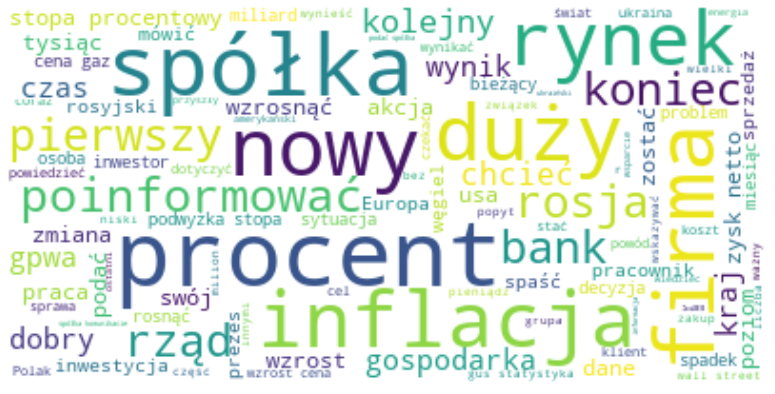

In [ ]:
wordcloud = WordCloud(stopwords=pl_stop_words, max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Wystƒôpowanie sp√≥≈Çek WIG20

In [ ]:
from collections import Counter

In [ ]:
wig_20 = {'Allegro' : ['allegro', 'ale'],  #
        'Asseco' : ['asseco', 'acp'], #
        'CD Project': ['cd projekt', 'cdr'],
        'CCC': ['ccc'], #
        'Cyfrowy Polsat': ['polsat', 'cps'], #
        'Dino Polska' : ['dino', 'dnp'],#
        'PGN SA' : ['polskie g√≥rnictwo naftowe i gazownictwo', 'pgn', 'pgnig'], 
        'Grupa Kety' : ['kty', 'kƒôty'], #
        'JSW' : ['jastrzƒôbska sp√≥≈Çka wƒôglowa', 'jsw'],#
        'KGHM Polska Mied≈∫' : ['kghm', 'kgh'], #
        'LPP' : ['lpp'], #
        'mBank' : ['mbank', 'mbk'] , #
        'Orange Polska' : ['orange', 'opl'], 
        'Pekao BP' : ['polska kasa opieki', 'pekao', 'peo'],#
        'Pepco' : ['pepco', 'pco'], #
        'PGE' : ['pge polska grupa energetyczna', 'pge'],#
        'Orlen' : ['polski koncern naftowy', 'orlen', 'pkn'],#
        'PKO BP' : ['powszechna kasa oszczednosci bank polski', 'pko'], #
        'PZU' : ['powszechny zak≈Çad ubezpiecze≈Ñ', 'pzu'], #
        'Santander' : ['santander', 'spl']}#

In [ ]:
wig_20_freq = []
for k, i in wig_20.items():
  for word in words_lemma_no_stop:
    if word in i:
      wig_20_freq.append(k)

wig_20_count = Counter(wig_20_freq)
wig_20_count = {k: v for k, v in sorted(wig_20_count.items(), key=lambda item: item[1], reverse=True)}

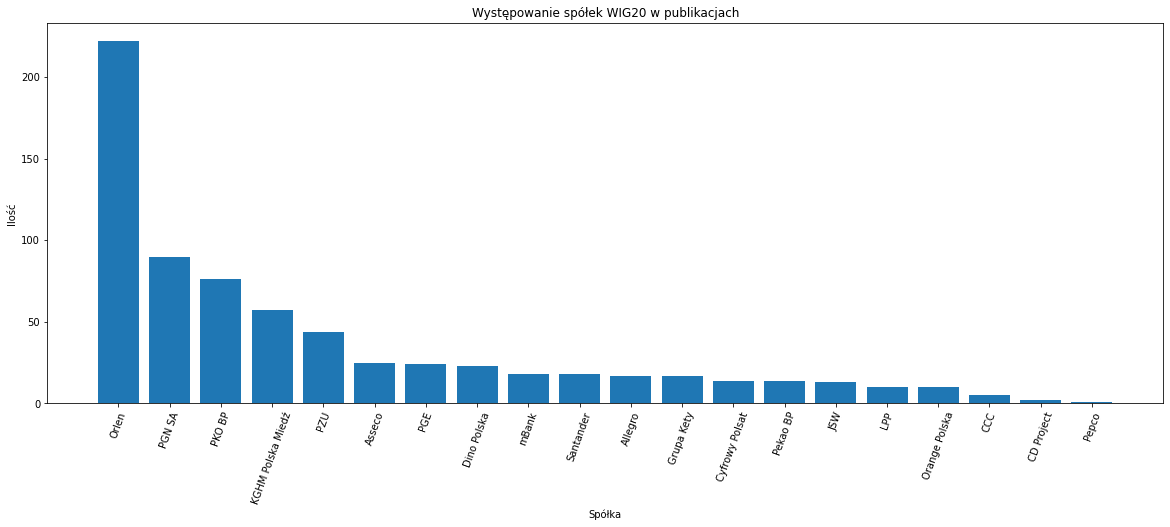

In [ ]:
fig, ax = plt.subplots(figsize=(20,7))
ax.xaxis.set_tick_params(rotation=70)
ax.set_xlabel("Sp√≥≈Çka")
ax.set_ylabel('Ilo≈õƒá')
plt.title("Wystƒôpowanie sp√≥≈Çek WIG20 w publikacjach")
plt.bar(range(len(wig_20_count)), list(wig_20_count.values()), align='center')
plt.xticks(range(len(wig_20_count)), list(wig_20_count.keys()))
plt.show()

##Sentyment

### Przypisanie sentymentu ze zbioru LOBI

In [ ]:
#LOBI do s≈Çownika
nawl_dict = pd.read_csv('/content/nawl-analysis.csv', header=None, index_col=0, squeeze=True).to_dict()
#wyciƒÖgniƒôcie tylko kategorii
nawl_cat = nawl_dict[1]
len(nawl_cat)

2903

In [ ]:
# Policzenie wystƒÖpie≈Ñ s≈Ç√≥w z listy s≈Ç√≥w zlemmatyzowanych i przypisanie Kategorii
sent_category = []
for k, i in nawl_cat.items():
  for word in words_lemma_no_stop:
    if word in k:
      sent_category.append(i)

sent_category = Counter(sent_category)

In [ ]:
#zmiana na df i zdropowanie kategorii, neutral, unclassified i zamiana na polskie nazwy
df_sent_category = pd.DataFrame.from_dict(sent_category, orient='index', dtype=None, columns=['Ilo≈õƒá'])
df_sent_category = df_sent_category.drop(['category', 'N', 'U'])
df_sent_category.rename(index={'H': 'Szczƒô≈õcie',
                               'A': 'Z≈Ço≈õƒá', 
                               'S': 'Smutek',
                               'F': 'Strach',
                               'D': 'Wstrƒôt'}, inplace=True)
#sortowanie po ilo≈õci wystƒÖpie≈Ñ
df_sent_category = df_sent_category.sort_values(by=['Ilo≈õƒá'],ascending=False)                          

In [ ]:
df_sent_category

Ilo≈õƒá
Strach     25606
Szczƒô≈õcie  20224
Z≈Ço≈õƒá      16513
Smutek      8713
Wstrƒôt      5666

###Wykres sentymentu

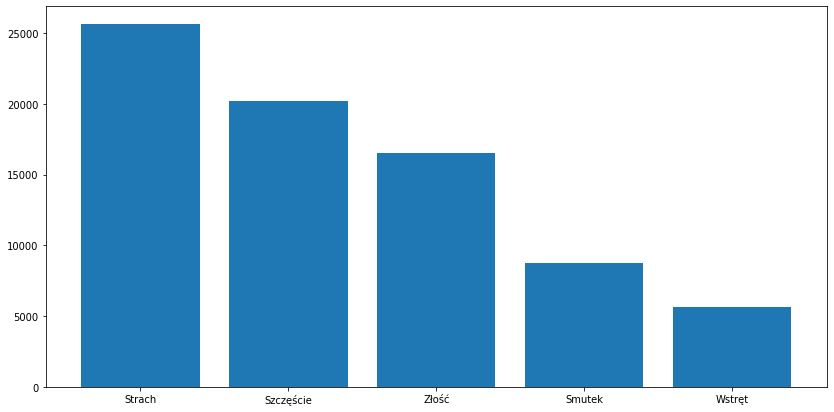

In [ ]:
height = df_sent_category.Ilo≈õƒá
bars = df_sent_category.index
x_pos = np.arange(len(df_sent_category))

fig, ax = plt.subplots(figsize=(14,7))
plt.bar(x_pos, height)


plt.xticks(x_pos, bars)

# Show graph
plt.show()

##Wykresy gie≈Çdowe

###Ceny akcji

Text(0.5, 0.98, 'Ceny Akcji WIG 20')

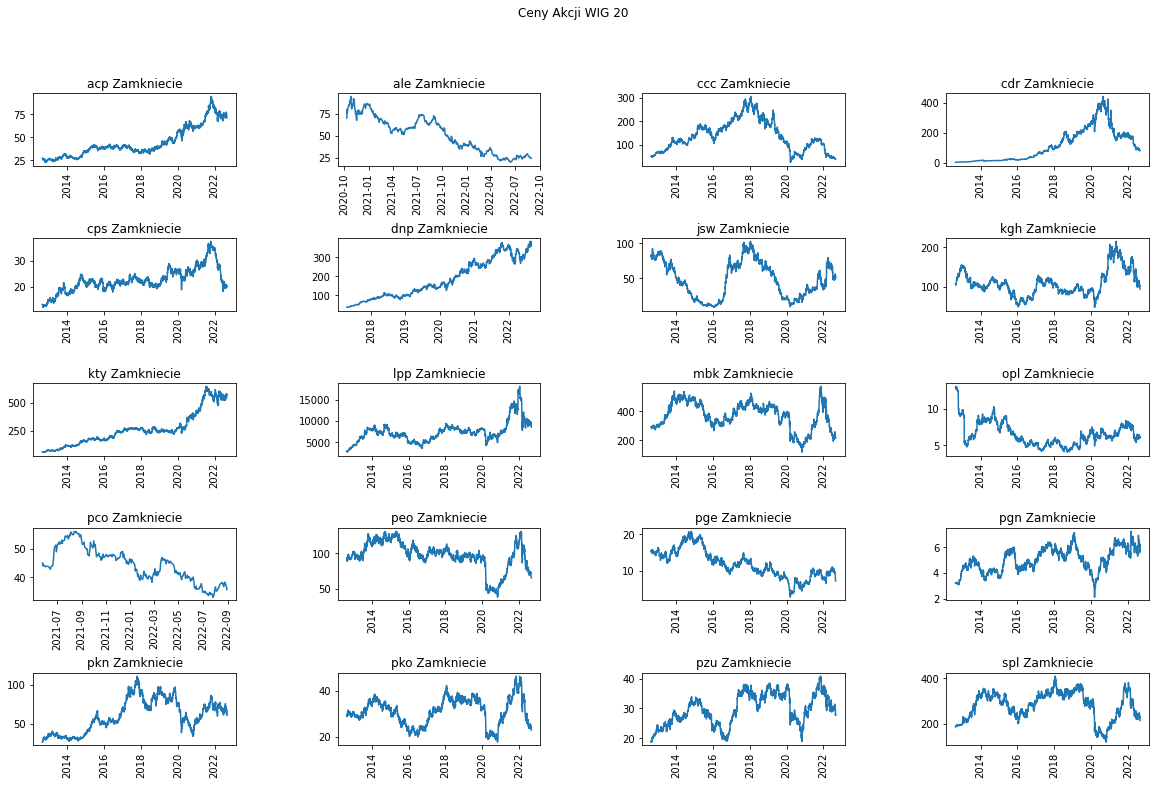

In [ ]:
plt.figure(figsize=(20, 12))
for i in range(len(tiki_zamkniecie)):
    plt.subplot(5,4,i+1)
    plt.subplots_adjust( hspace=1 ,wspace=0.5)
    plt.title(tiki_zamkniecie[i])
    plt.plot(stocks[tiki_zamkniecie[i]])
    plt.xticks(rotation=90)
plt.suptitle("Ceny Akcji WIG 20")

###Zmiany procentowe

Text(0.5, 0.98, 'Zmiany procentowe sp√≥≈Çek WIG20')

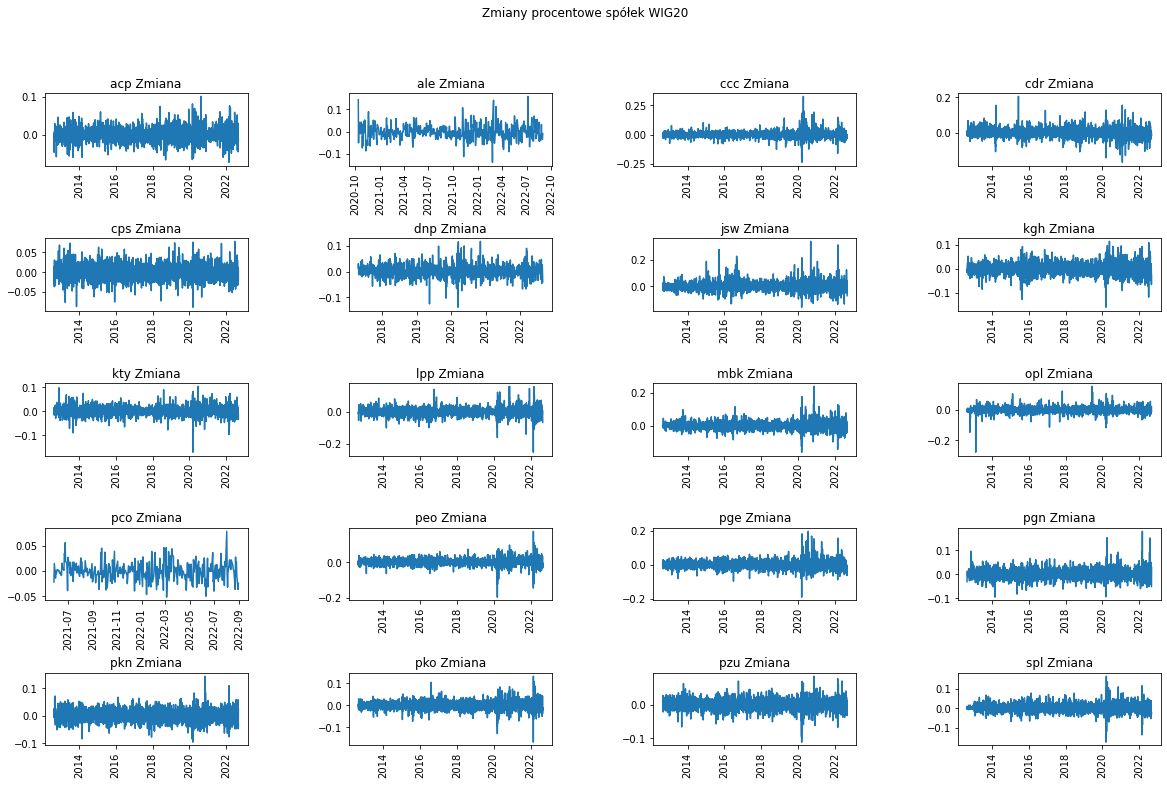

In [ ]:
plt.figure(figsize=(20, 12))
for i in range(len(tiki_zmiana)):
    plt.subplot(5,4,i+1)
    plt.subplots_adjust( hspace=1 ,wspace=0.5)
    plt.title(tiki_zmiana[i])
    plt.plot(stocks[tiki_zmiana[i]])
    plt.xticks(rotation=90)
plt.suptitle("Zmiany procentowe sp√≥≈Çek WIG20")

###Por√≥wnianie "du≈ºego" WIG z WIG20

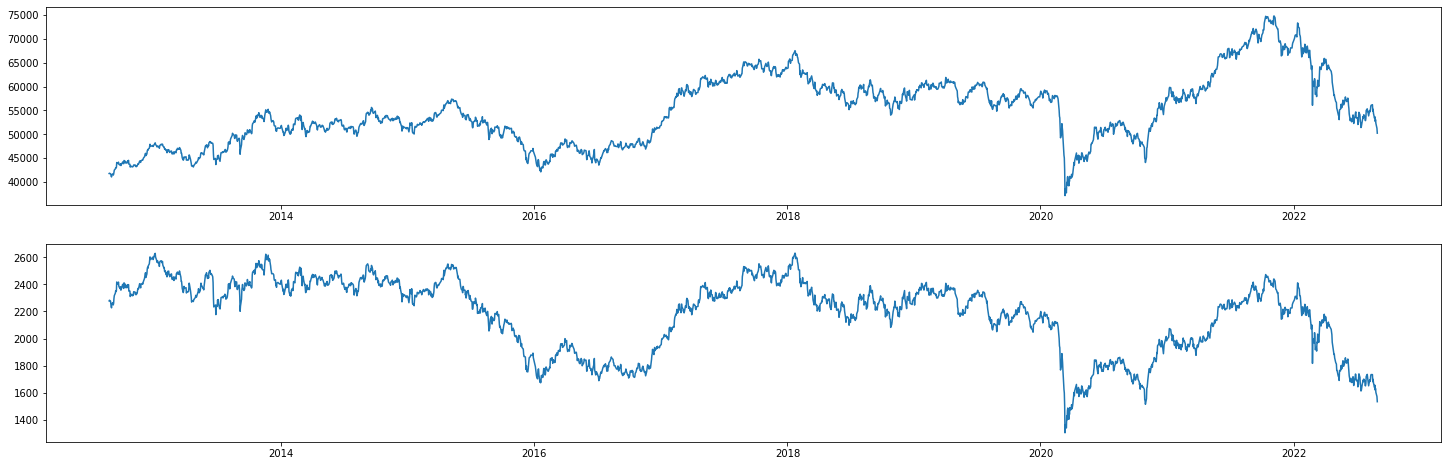

In [ ]:
fig, ax = plt.subplots(2,figsize=(25,8))
ax[0].plot(wig['wig Zamkniecie'])
ax[1].plot(wig20['wig20 Zamkniecie'])

###Korelacja cen zamkniƒôcia sp√≥≈Çek WIG 20

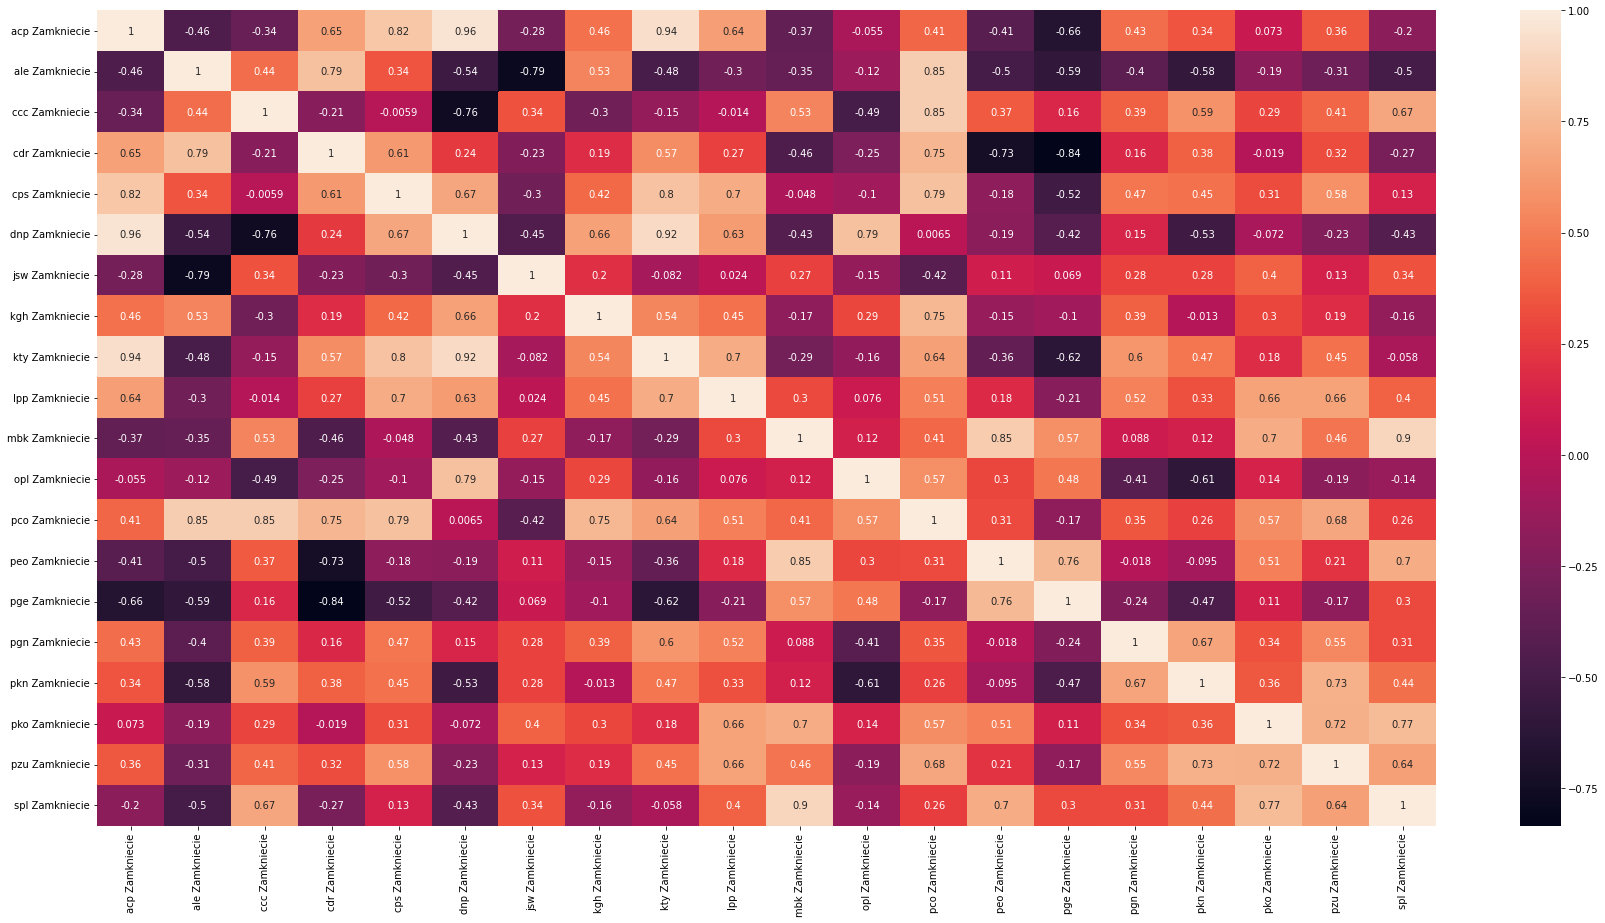

In [ ]:
correlation = stocks[tiki_zamkniecie].corr()
fig = plt.figure(figsize = (30, 15))
sns.heatmap(correlation, annot = True)
plt.show()

###Korelacja dziennych zmian sp√≥≈Çek WIG 20

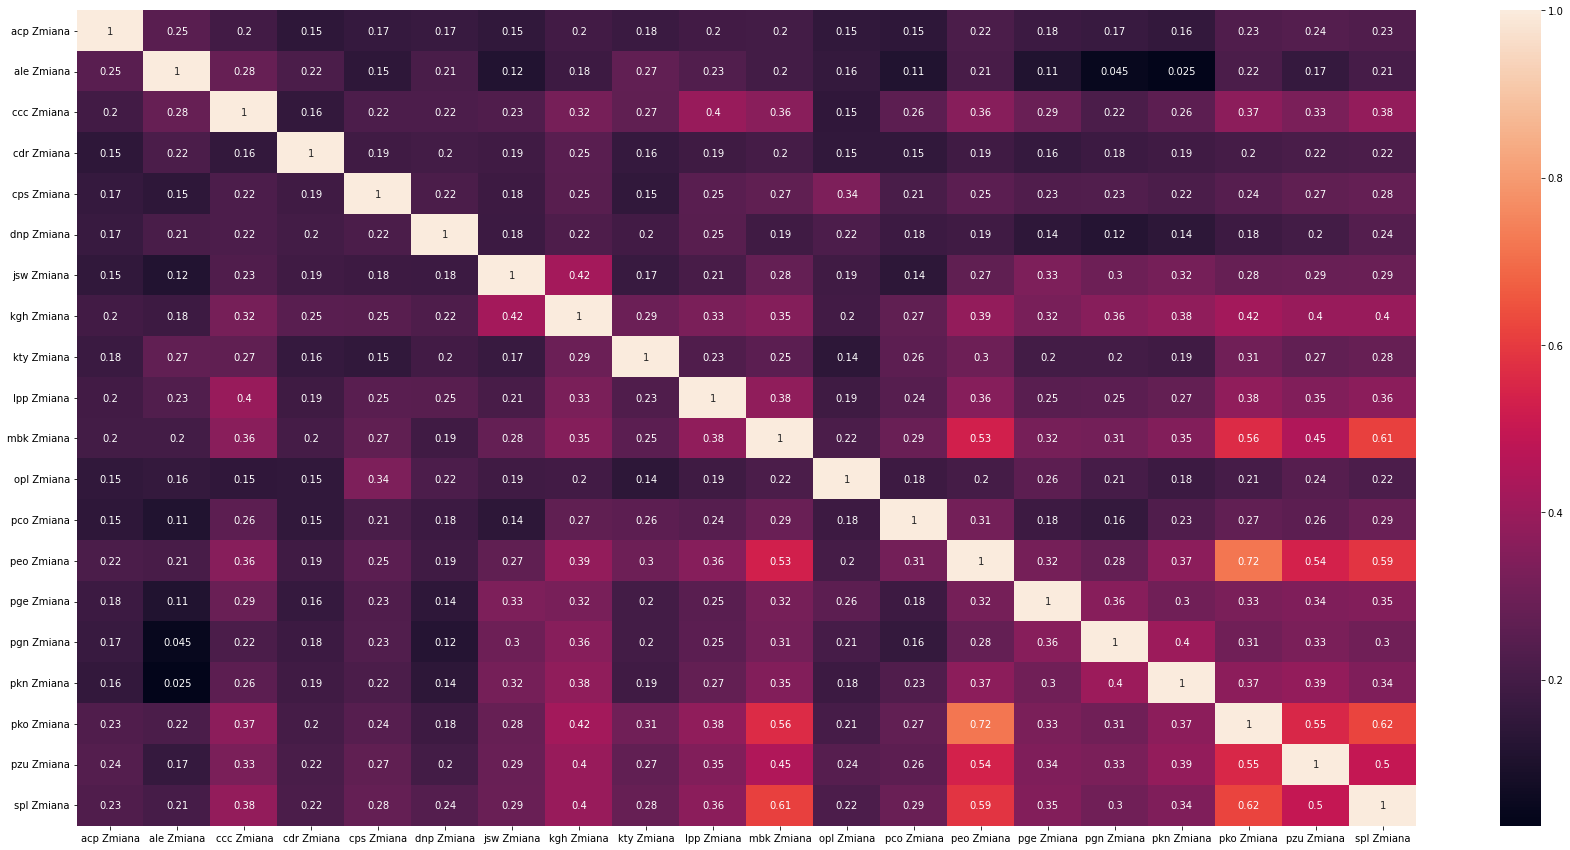

In [ ]:
plt.figure(figsize=(30,15))
correlation = stocks[tiki_zmiana].corr()
sns.heatmap(correlation, annot=True)
plt.show()

###Korelacja dziennych wolumen√≥w sp√≥≈Çek WIG 20

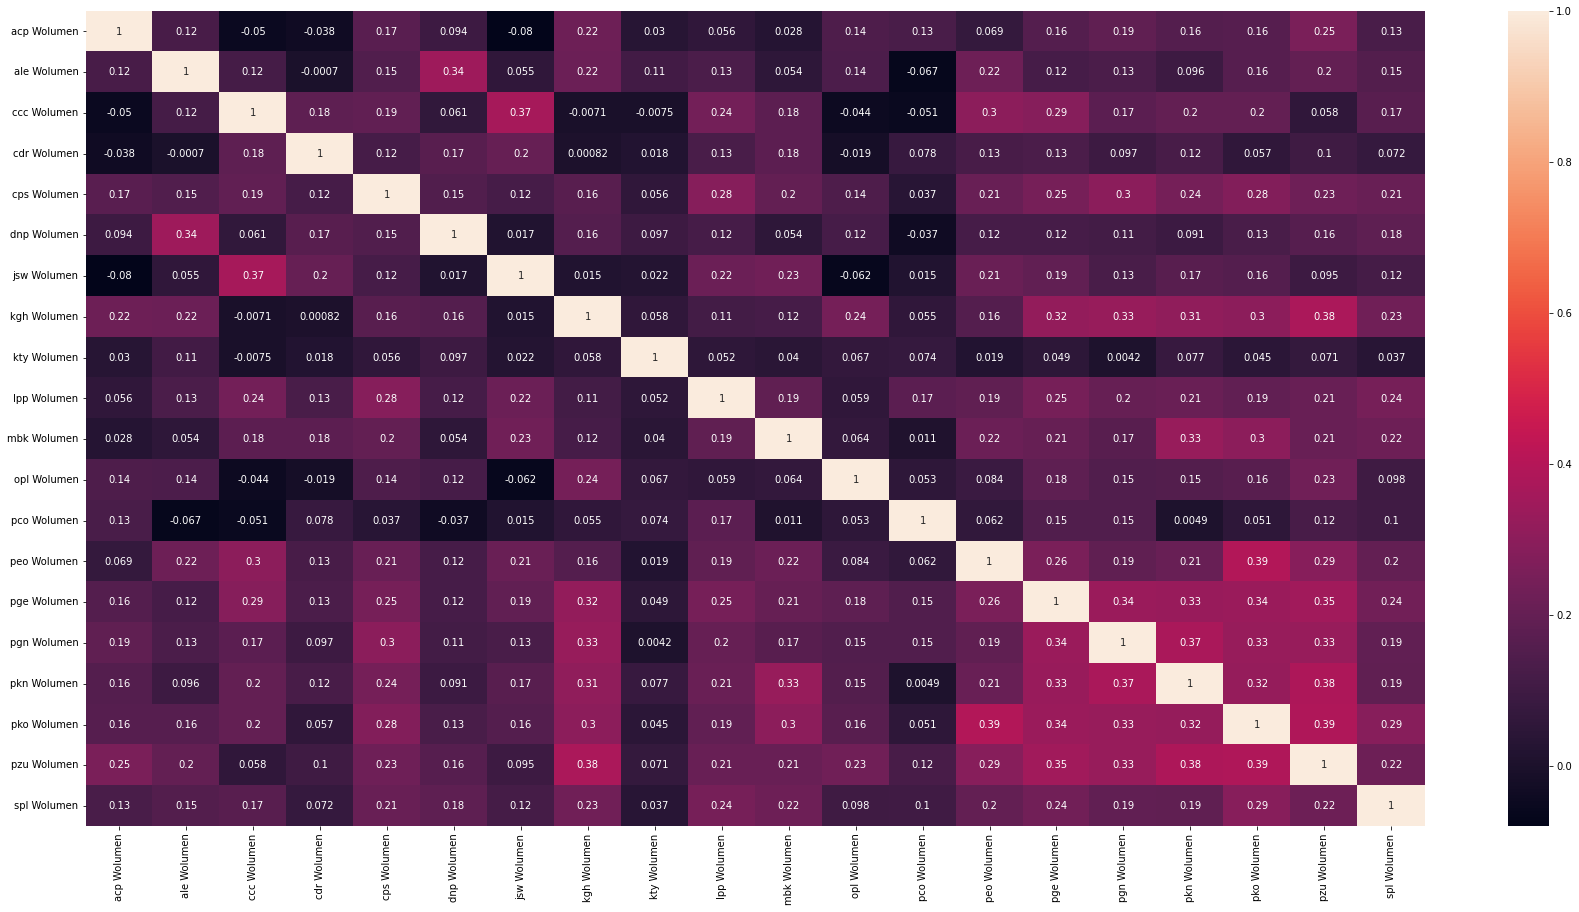

In [ ]:
plt.figure(figsize=(30,15))
correlation = stocks[tiki_wolumen].corr()
sns.heatmap(correlation, annot=True)
plt.show()

###Box plot z cenami

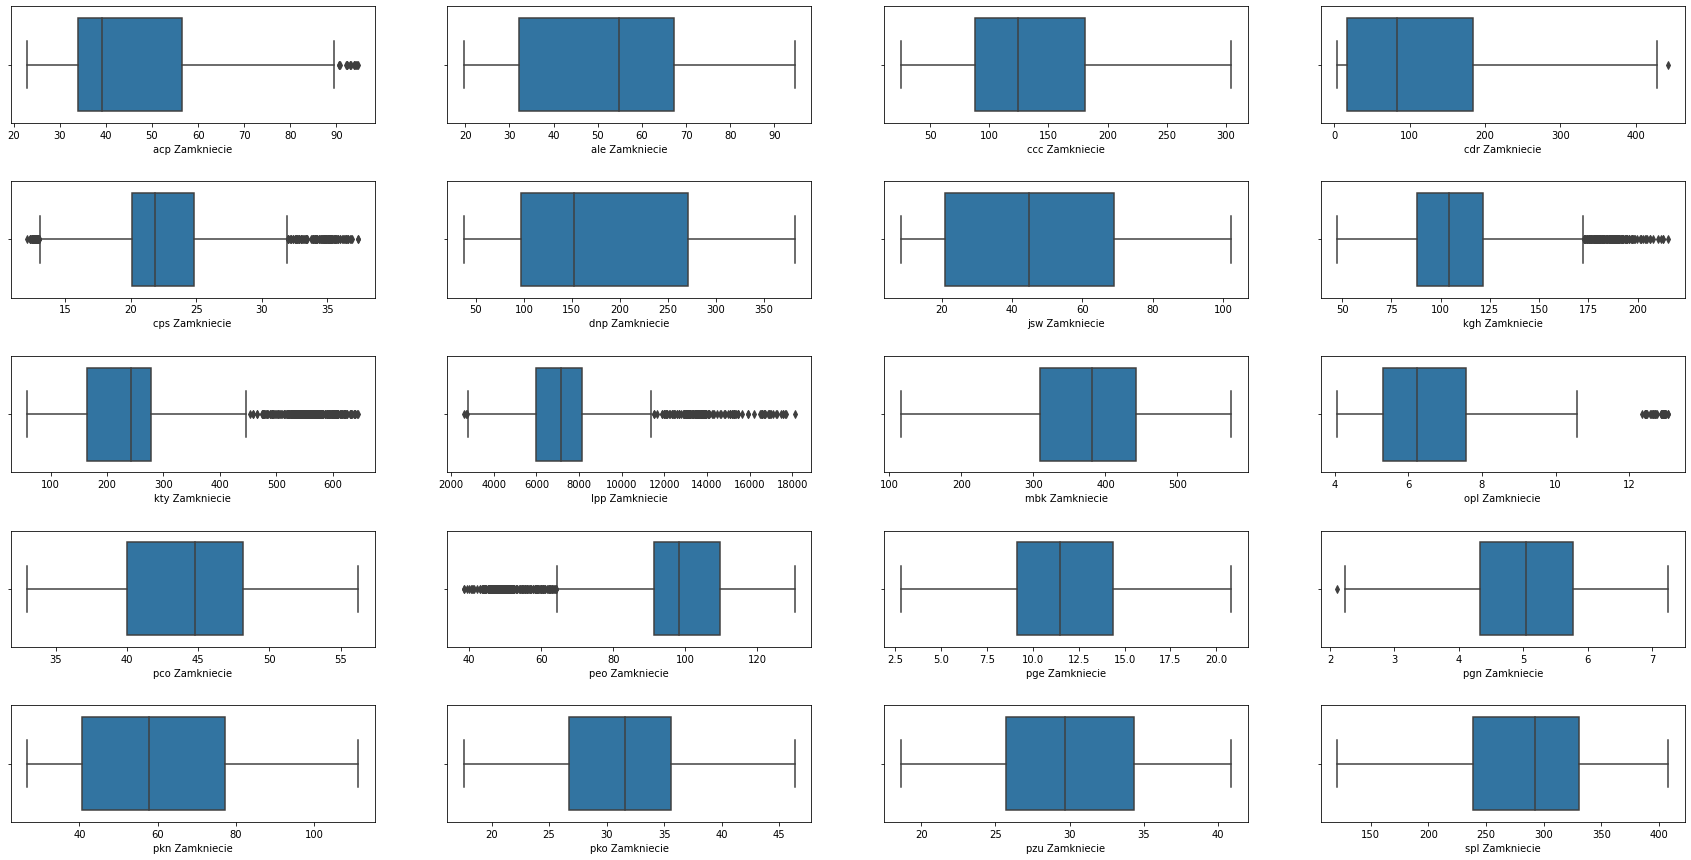

In [ ]:
plt.figure(figsize=(30, 15))

for i in range(len(tiki_zamkniecie)):
    plt.subplot(5, 4, i+1)
    plt.subplots_adjust( hspace=0.5 )
    sns.boxplot(x=stocks[tiki_zamkniecie[i]])

###Box Plot z zmianami procentowymi

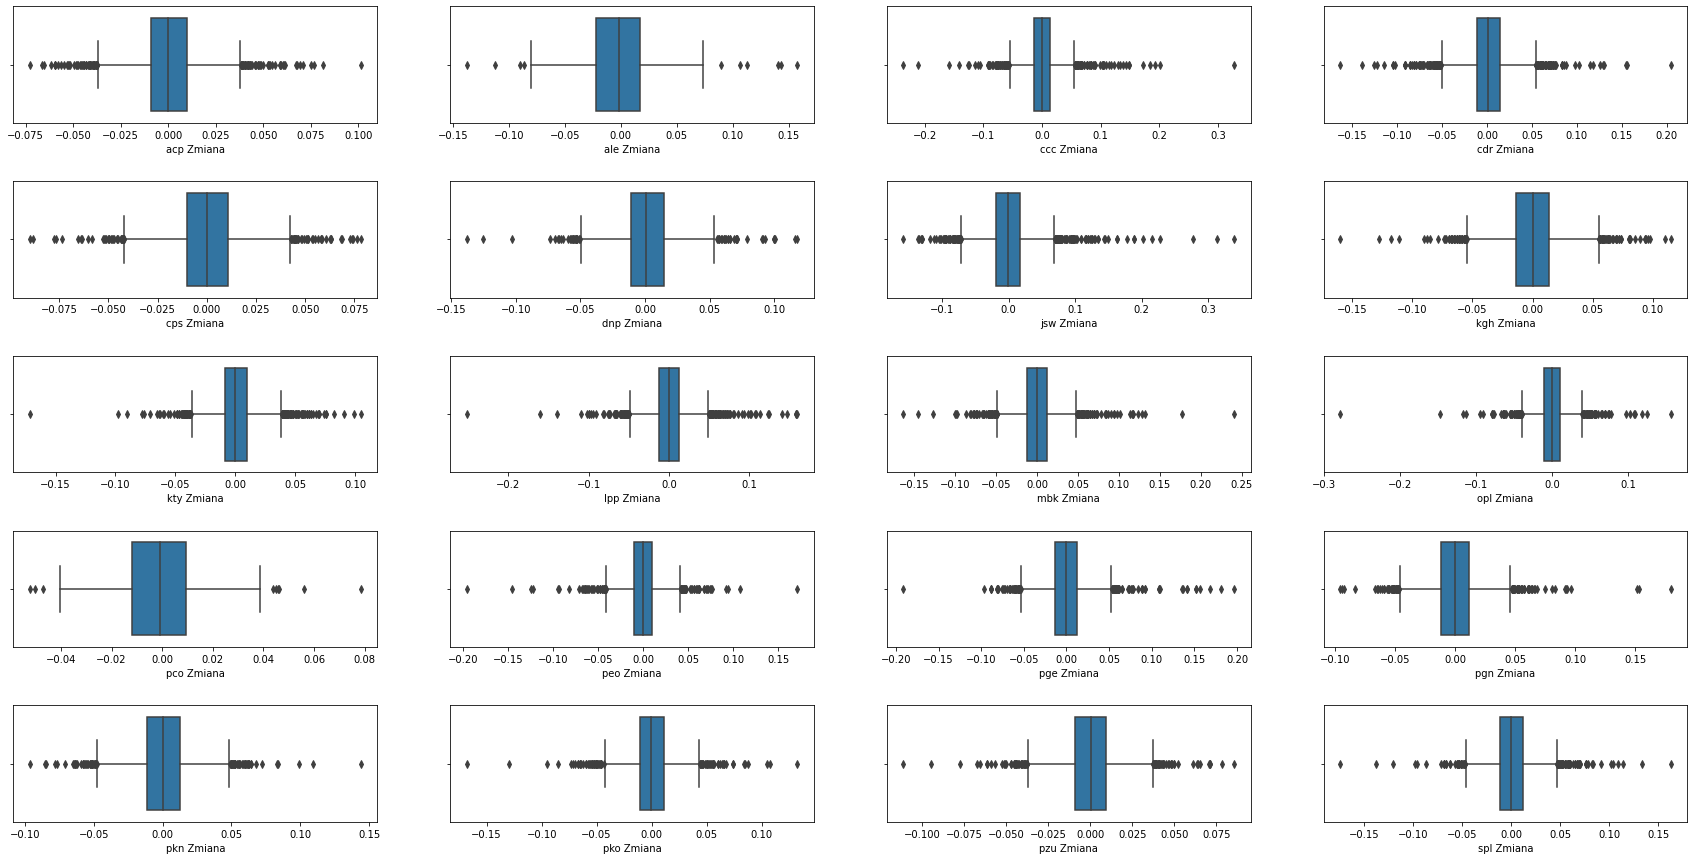

In [ ]:
plt.figure(figsize=(30, 15))

for i in range(len(tiki_zmiana)):
    plt.subplot(5, 4, i+1)
    plt.subplots_adjust( hspace=0.5 )
    sns.boxplot(x=stocks[tiki_zmiana[i]])

#Topic modeling

LDA nienadzorowane uczenie maszynowe, kt√≥re stosuje techniki grupowania do znajdowania ukrytych struktur.

In [ ]:
from gensim import corpora
from gensim.utils import tokenize


descriptions = [list(tokenize(t)) for t in all['Text']]

dictionary = corpora.Dictionary(descriptions)
corpus = [dictionary.doc2bow(text) for text in descriptions]

In [ ]:
import gensim
NUM_TOPICS = 4
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50)

In [ ]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
  print(topic)

(0, '0.009*"ropa" + 0.007*"produkcja" + 0.007*"cena" + 0.005*"q"')
(1, '0.007*"sp√≥≈Çka" + 0.005*"dolar" + 0.005*"kurs" + 0.005*"euro"')
(2, '0.010*"rynek" + 0.009*"gpwa" + 0.008*"stopa" + 0.007*"inflacja"')
(3, '0.022*"rok" + 0.015*"procent" + 0.011*"milion" + 0.011*"cena"')


In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim_models
lda_display = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary, sort_topics=True)
pyLDAvis.save_html(lda_display, 'sk_topics.html')

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


#Klasteryzacja Hierarchiczna

##Dywersyfikacja sp√≥≈Çek ze wzglƒôdu na dzienne zmiany cenowe

In [ ]:
price_change = get_price_change()

Pobieram dzienne zmiany procentowe: acp
Pobieram dzienne zmiany procentowe: ale
Pobieram dzienne zmiany procentowe: ccc
Pobieram dzienne zmiany procentowe: cdr
Pobieram dzienne zmiany procentowe: cps
Pobieram dzienne zmiany procentowe: dnp
Pobieram dzienne zmiany procentowe: jsw
Pobieram dzienne zmiany procentowe: kgh
Pobieram dzienne zmiany procentowe: kty
Pobieram dzienne zmiany procentowe: lpp
Pobieram dzienne zmiany procentowe: mbk
Pobieram dzienne zmiany procentowe: opl
Pobieram dzienne zmiany procentowe: pco
Pobieram dzienne zmiany procentowe: peo
Pobieram dzienne zmiany procentowe: pge
Pobieram dzienne zmiany procentowe: pgn
Pobieram dzienne zmiany procentowe: pkn
Pobieram dzienne zmiany procentowe: pko
Pobieram dzienne zmiany procentowe: pzu
Pobieram dzienne zmiany procentowe: spl


In [ ]:
price_change_corr_matrix = price_change.corr()

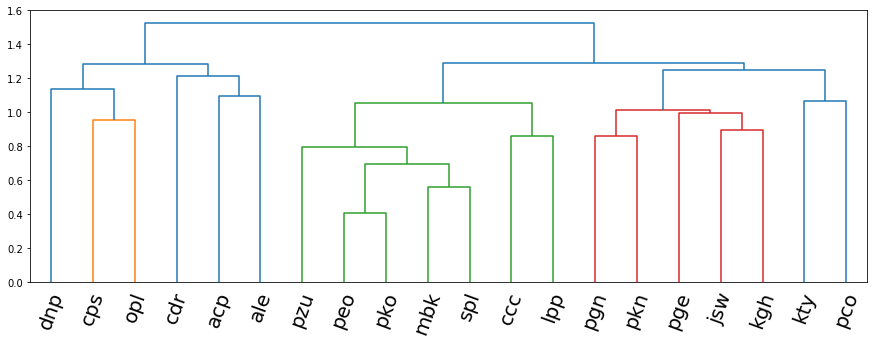

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram


mergings = linkage(price_change_corr_matrix, method='complete')

fig, ax = plt.subplots(figsize=(15,5))
dendrogram(mergings,
           labels=price_change_corr_matrix.index,
           leaf_rotation=70,
           leaf_font_size=20,
            )
plt.show()

##Dywersyfikacja sp√≥≈Çek ze wzglƒôdu na dzienne wolumeny ilo≈õciowe

In [ ]:
wolumen = get_all_volumen()
wolumen_corr_matrix = wolumen.corr()

Pobieram dzienne wolumeny obrotu: acp
Pobieram dzienne wolumeny obrotu: ale
Pobieram dzienne wolumeny obrotu: ccc
Pobieram dzienne wolumeny obrotu: cdr
Pobieram dzienne wolumeny obrotu: cps
Pobieram dzienne wolumeny obrotu: dnp
Pobieram dzienne wolumeny obrotu: jsw
Pobieram dzienne wolumeny obrotu: kgh
Pobieram dzienne wolumeny obrotu: kty
Pobieram dzienne wolumeny obrotu: lpp
Pobieram dzienne wolumeny obrotu: mbk
Pobieram dzienne wolumeny obrotu: opl
Pobieram dzienne wolumeny obrotu: pco
Pobieram dzienne wolumeny obrotu: peo
Pobieram dzienne wolumeny obrotu: pge
Pobieram dzienne wolumeny obrotu: pgn
Pobieram dzienne wolumeny obrotu: pkn
Pobieram dzienne wolumeny obrotu: pko
Pobieram dzienne wolumeny obrotu: pzu
Pobieram dzienne wolumeny obrotu: spl


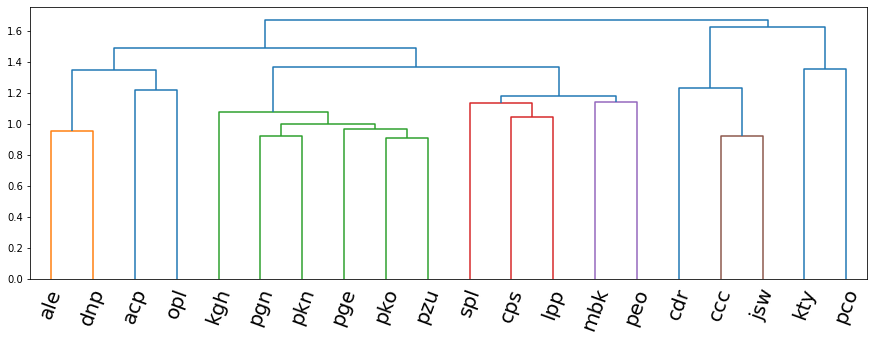

In [ ]:
mergings = linkage(wolumen_corr_matrix, method='complete')

fig, ax = plt.subplots(figsize=(15,5))
dendrogram(mergings,
           labels=wolumen_corr_matrix.index,
           leaf_rotation=70,
           leaf_font_size=20,
            )
plt.show()